<a href="https://colab.research.google.com/github/thomas-abadie/rectangular-microchannel_velocity-pressure/blob/main/velocity_pressure_rectangular_microchannel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flow field in a rectangular channel**

Given a rectangular channel with a cross section $2W \times 2H = 1 \ {\rm mm} \times 0.1 \ {\rm mm}$, let us note the aspect ratio $\alpha = 2W / 2H$.
The velocity field can be written:
\begin{equation}
  u(x,y) = - \frac{16 c_1 W^2}{\pi^3} \displaystyle\sum_{n=0}^{\infty} \frac{\left(-1\right)^n}{(2n + 1)^3} \left[ 1 - \frac{{\rm cosh} \left(\frac{\left(2n+1\right) \pi y}{2W} \right)}{{\rm cosh} \left(\frac{\left(2n+1\right) \pi H}{2W}  \right)}\right] cos \left(\frac{\left(2n + 1 \right) \pi x }{2W} \right) \ .
  %\frac{{\rm cosh} \frac{\left(\left(2n + 1\right) \pi y}{2W}\right)\right)}{np.cosh\left(n*np.pi*H/(2*W)\right)}\right)
\end{equation}
$c_1$ is written:
\begin{equation}
  c_1 = - 3 \frac{u_m}{W^2}  \frac{1}{1 - \frac{192}{\pi^5} \frac{W}{H}\displaystyle\sum_{n=0}^{\infty} \frac{1}{\left(2n + 1\right)^5} {\rm tanh} \left(\frac{\left(2n + 1\right) \pi H}{2 W} \right)}\ ,
\end{equation}
where $u_m$ is the average fluid velocity $u_m = Q/\left(2W \times 2H \right)$.

**Wall shear stress**

At the bottom wall of the channel, the wall shear stress (WSS) is written:
\begin{equation}
  \mu \left. \frac{\partial u(x,y)}{\partial y} \right|_{y=-H} = - \mu \frac{16 c_1 W^2}{\pi^3} \displaystyle\sum_{n=0}^{\infty} \frac{\left(-1\right)^n}{(2n + 1)^3} \left[ \frac{\left(2n+1\right)}{2W} \frac{{\rm sinh} \left(\frac{\left(2n+1\right) \pi H}{2W} \right)}{{\rm cosh} \left(\frac{\left(2n+1\right) \pi H}{2W}  \right)}\right] cos \left(\frac{\left(2n + 1 \right) \pi x }{2W} \right) \ .
  %\frac{{\rm cosh} \frac{\left(\left(2n + 1\right) \pi y}{2W}\right)\right)}{np.cosh\left(n*np.pi*H/(2*W)\right)}\right)
\end{equation}


0.9906302483861605


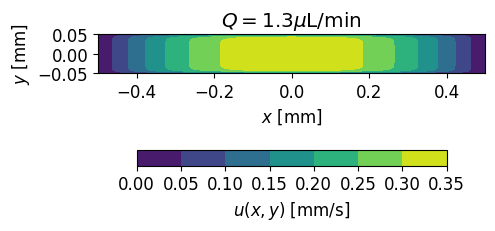

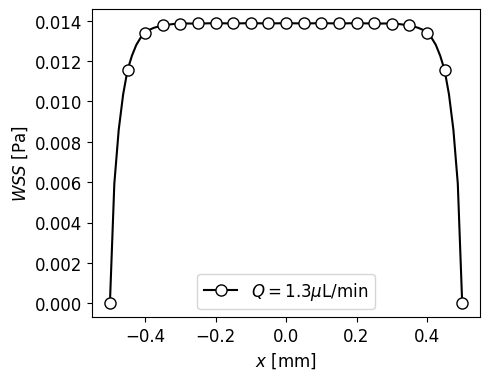

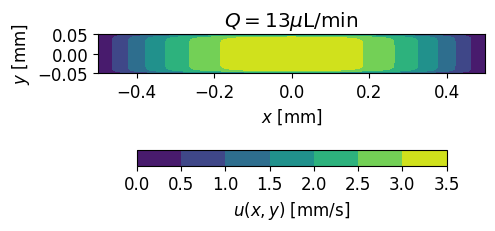

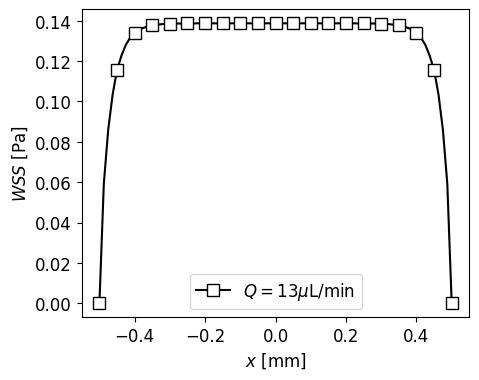

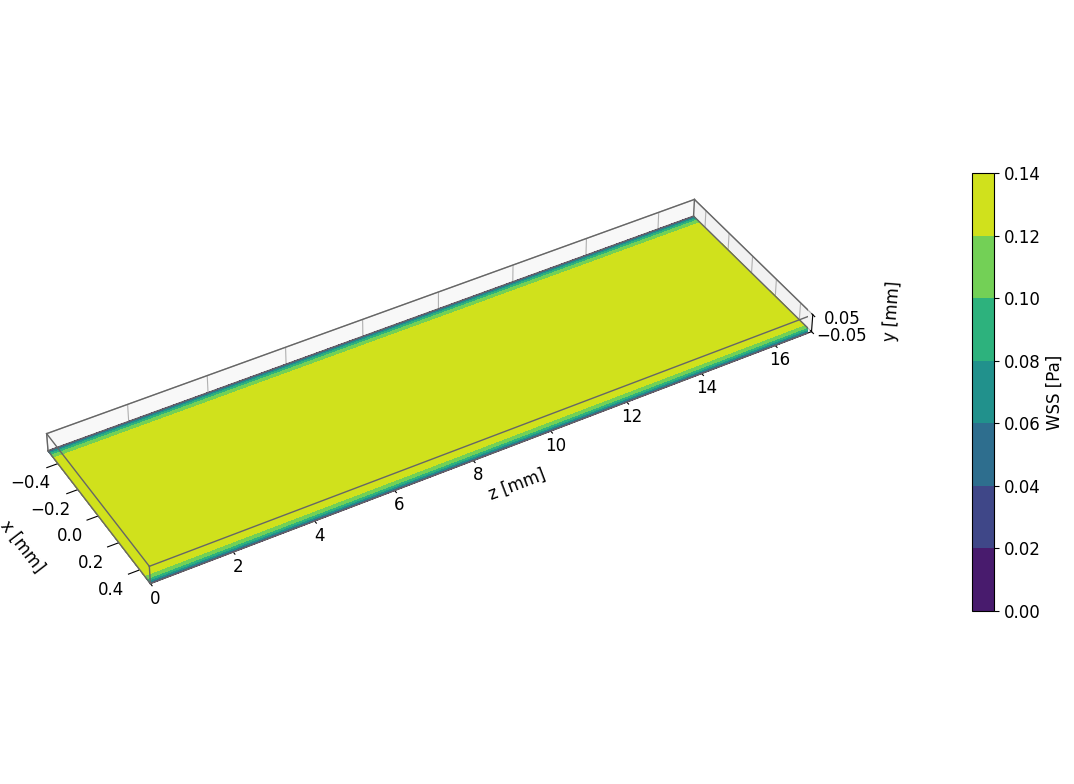

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# channel dimensions
W = 0.0005
H = 0.00005
L_channel = 0.017

# flow rate and average velocity
Q1 = 1.3 # flow rate in microlitre/min
Q1 = Q1*1e-9/60 # flow rate in m^3/s
um1 = Q1/(4*W*H) # average velocity

Q2 = 13 # flow rate in microlitre/min
Q2 = Q2*1e-9/60 # flow rate in m^3/s
um2 = Q2/(4*W*H) # average velocity

# fluid properties
rho = 1000
mu = 0.001

# calculaation of c1
sum1 = 0
for k in range(100):
  n = 2*k + 1
  s1 = 1/n**5*np.tanh(n*np.pi*H/(2*W))
  sum1 = sum1 + 192*W*s1/(H*(np.pi**5))
print(sum1)

c1 = (-3*um1/(W**2))/(1.-sum1)
c2 = (-3*um2/(W**2))/(1.-sum1)


# initialisation of the "mesh" to show the velocity field
nx = 81
ny = 81
x = np.linspace(-W, W, nx)
y = np.linspace(-H, H, ny)

xx, yy = np.meshgrid(x, y)
xv, yv = np.meshgrid(x, y, indexing='ij')
u1 = 0.*xv
dudy1 = 0.*x
u2 = 0.*xv
dudy2 = 0.*x

# calculation of the velocity field
sum2 = 0

for i in range(nx):
  for j in range(ny):
    sum2 = 0
    for k in range(50):
      n = 2*k + 1
      s2 = (-1)**((n-1.)/2.)/n**3*(1 - np.cosh(n*np.pi*yv[i,j]/(2*W))/np.cosh(n*np.pi*H/(2*W)))*np.cos(n*np.pi*xv[i,j]/(2*W))
      sum2 = sum2 + s2
    u1[i,j] = -16*c1*W**2*sum2/np.pi**3
    u2[i,j] = -16*c2*W**2*sum2/np.pi**3




# plot the velocity field
fig = plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 12})
ax = fig.add_subplot(111)
plt.subplot(111)
h = plt.contourf(x*1000,y*1000,u1*1000)
plt.axis('scaled')
ax.set(
    xlabel='$x$ [mm]',
    ylabel='$y$ [mm]',
    title='$Q = 1.3 \mu$L/min'
)
plt.colorbar(orientation='horizontal',ax=ax, pad=0.25,shrink=0.8, label='$u(x,y)$ [mm/s]')

plt.show()


for ii in range(nx):
  sum3 = 0
  for kk in range(50):
    nn = 2*kk + 1
    s3 = (-1)**((nn-1.)/2.)/nn**3*(nn*np.pi/(2*W)*np.tanh(nn*np.pi*H/(2*W)))*np.cos(nn*np.pi*x[ii]/(2*W))
    sum3 = sum3 + s3
  dudy1[ii] = -mu*16*c1*W**2*sum3/np.pi**3
  dudy2[ii] = -mu*16*c2*W**2*sum3/np.pi**3

# plot the WSS
fig2 = plt.figure(figsize=(5, 4))
ax = fig2.add_subplot(111)
plt.rcParams.update({'font.size': 12})
ax.set(
    xlabel='$x$ [mm]',
    ylabel='$WSS$ [Pa]'
)
h = plt.plot(x*1000,dudy1,color='k',marker='o',markerfacecolor='w',markersize=8,markevery=4,label='$Q = 1.3 \mu$L/min')
#h = plt.plot(z,p2,color='k',marker='s',markerfacecolor='k',markersize=8,label='$Q = 13 \mu$L/min')
lgd = plt.legend(loc='best')
plt.show()

# plot the velocity field
fig3 = plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 12})
ax = fig3.add_subplot(111)
h = plt.contourf(x*1000,y*1000,u2*1000)
plt.axis('scaled')
ax.set(
    xlabel='$x$ [mm]',
    ylabel='$y$ [mm]',
    title='$Q = 13 \mu$L/min'
)
plt.colorbar(orientation='horizontal',ax=ax, pad=0.25,shrink=0.8, label='$u(x,y)$ [mm/s]')

plt.show()

fig4 = plt.figure(figsize=(5, 4))
ax = fig4.add_subplot(111)
plt.rcParams.update({'font.size': 12})
ax.set(
    xlabel='$x$ [mm]',
    ylabel='$WSS$ [Pa]'
)
h = plt.plot(x*1000,dudy2,color='k',marker='s',markerfacecolor='w',markersize=8,markevery=4,label='$Q = 13 \mu$L/min')
#h = plt.plot(z,p2,color='k',marker='s',markerfacecolor='k',markersize=8,label='$Q = 13 \mu$L/min')
lgd = plt.legend(loc='best')
plt.show()

fig5 = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define dimensions
nz = 171
z = np.linspace(0, L_channel, nz)
X1, Y1, Z1 = np.meshgrid(x*1000, z*1000, y*1000, indexing='ij')

# Create fake data
data = 0.*(X1 + Y1 +Z1)
for ii in range(nx):
  for jj in range(nz):
    aaa = dudy2[ii]
    data[ii,jj,0] = aaa

kw = {
    'vmin': 0,
    'vmax': 0.14,
    'levels': np.linspace(0, 0.14, 8),
}

# Plot contour surfaces
C = ax.contourf(
    X1[:, :, 0], Y1[:, :, 0,], data[:, :,0],
    zdir='z', offset=-0.05, **kw
)

# Set limits of the plot from coord limits
xmin, xmax = X1.min(), X1.max()
ymin, ymax = Y1.min(), Y1.max()
zmin, zmax = Z1.min(), Z1.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmin, xmax], [ymin, ymin], zmax, **edges_kw)
ax.plot([xmin, xmax], [ymax, ymax], zmax, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmax, xmax], [ymax, ymax], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymax, ymax], [zmin, zmax], **edges_kw)
ax.plot([xmax, xmax], [ymin, ymax], zmax, **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], zmax, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymax, ymax], zmin, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], zmin, **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='x [mm]',
    ylabel='z [mm]',
    zlabel='y [mm]',
    zticks=[-0.05, 0.05],
)




ax.xaxis.labelpad=10
ax.yaxis.labelpad=40
ax.zaxis.labelpad=10

# Set zoom and angle view]
ax.view_init(40, -30, 0)
ax.set_box_aspect((1,3.4,0.1), zoom=1)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.15, label='WSS [Pa]')

fig.set_tight_layout(True)

plt.show()





**Pressure drop and pressure distribution**

The pressure at the outlet of the channel can be written as:
\begin{equation}
  P_{out} = P_{atm} + \rho g h + \frac{\mu L Q}{32 \pi D^4}
\end{equation}
where $P_{atm}$ is the atmospheric pressure, $\rho$ and $\mu$ are the density and dynamic viscosity of the fluid, $h$ is the height of the outlet tubing, $Q$ is the flow rate and $D$ is the diameter of the outlet tubing.

Givent the very low flow rates, the friction pressure drop is negligible ($< 1 {\rm Pa}$) when compared to the atmospheric pressure (this might change if your fluid is very viscous).

When the outlet tubing is raised 40 cm above the microfluidic channel, the outlet pressure is $P_{out} - P_{atm} = 3924 {\rm Pa}$.

The pressure drop along the channel can be expressed:
\begin{equation}
  \frac{dp}{dz} = \frac{\lambda \rho u_m^2}{2 D_h}
\end{equation}
where $D_h$ is the hydraulic diameter and $\lambda$ depends on the aspect ratio of the channel:
\begin{equation}
 \lambda = \frac{96}{Re} \left(1 - 1.3553 \alpha^{-1} + 1.9467 \alpha^{-2} - 1.7012 \alpha^{-3} + 0.9564 \alpha^{-4} - 0.2537 \alpha^{-5}  \right) \ .
\end{equation}

Alternatively, the pressure at a given point in the channel, with $P_{out}$ the pressure at the exit of the channel, L the channel length ($L = 40 \ {\rm cm}$) and $z$ the position from the inlet (i.e. $L-z$ is the position relative to the outlet) is given by:
\begin{equation}
p(z) = P_{out} + (L-z)*\frac{dp}{dz}
\end{equation}
The pressure drop across the microfluidic channel ranges from $4.7 \ {\rm Pa}$ to $47 \ {\rm Pa}$ for flow rates between $1.3 \ \mu{\rm L/min}$ and $13 \ \mu{\rm L/min}$ (I was not 100\% sure about the viscosity so I used the viscosity of water for the moment, these values will change).

101300.0

3924.0

8.620892750810996e-05

105224.00008620892

101300.0

3924.0

0.0008620892750810996

105224.00086208928

2.1666666666666666e-11

2.1666666666666667e-10

277.5806697378

2775.806697378

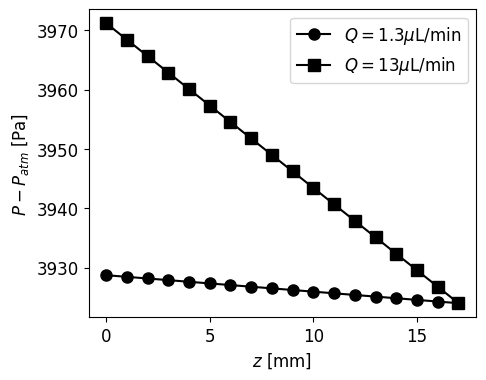

In [4]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81

# channel dimensions
W = 0.0005
H = 0.00005
L_channel = 0.017
alpha = W/H
Dh = 4*(4*W*H)/(2*(2*W + 2*H))

# outer tube dimensions
L_tube = 0.4 # length in m
D_tube = 0.001 # diameter in m

# outlet elevation (in m)
dh = 0.4

# fluid properties
rho = 1000
mu = 0.001

# flow rate and average velocity
Q = 1.3 # flow rate in microlitre/min
Q = Q*1e-9/60 # flow rate in m^3/s
um = Q/(4*W*H) # average velocity
Re = rho/mu*um*Dh
l1 = (1-1.3553/alpha + 1.9467/alpha**2 - 1.7012/alpha**3 + 0.9563/alpha**4 - 0.2537/alpha**5)
lambda1 = 96/Re*l1
dpdz = lambda1*rho*um**2/(2*Dh)

# calculation of pressure at the exit of the channel
P_static = rho*g*dh
P_atm = 1.013e5
P_friction = mu*L_tube*Q/(32*np.pi*D_tube**4)
display(P_atm, P_static, P_friction)
P_out = P_atm + P_static + P_friction
display(P_out)

## pressure in the channel
nz = 171
z = np.linspace(0, L_channel, nz)
p = (L_channel - z)*dpdz + P_out - P_atm

# flow rate and average velocity
Q2 = 13 # flow rate in microlitre/min
Q2 = Q2*1e-9/60 # flow rate in m^3/s
um2 = Q2/(4*W*H) # average velocity
Re2 = rho/mu*um2*Dh
l1 = (1-1.3553/alpha + 1.9467/alpha**2 - 1.7012/alpha**3 + 0.9563/alpha**4 - 0.2537/alpha**5)
lambda12 = 96/Re2*l1
dpdz2 = lambda12*rho*um2**2/(2*Dh)

# calculation of pressure at the exit of the channel
P_static = rho*g*dh
P_atm = 1.013e5
P_friction2 = mu*L_tube*Q2/(32*np.pi*D_tube**4)
display(P_atm, P_static, P_friction2)
P_out2 = P_atm + P_static + P_friction2
display(P_out2)

## pressure in the channel
#nz = 18
#z = np.linspace(0, L_channel, nz)
p2 = (L_channel - z)*dpdz2 + P_out2 - P_atm

display(Q,Q2,dpdz,dpdz2)

# plot the pressure along the channel
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 12})
ax.set(
    xlabel='$z$ [mm]',
    ylabel='$P - P_{atm}$ [Pa]'
)
h = plt.plot(z*1000,p,color='k',marker='o',markerfacecolor='k',markevery=10,markersize=8,label='$Q = 1.3 \mu$L/min')
h = plt.plot(z*1000,p2,color='k',marker='s',markerfacecolor='k',markevery=10,markersize=8,label='$Q = 13 \mu$L/min')
lgd = plt.legend(loc='upper right')

plt.show()

datacsv = np.array([z*1000,p,p2])

np.savetxt('P_h40.csv', datacsv.T, header='z,P-Patm (0.0013 mL/min),P-Patm (0.013 mL/min)', delimiter=',', fmt='%f')

101300.0

0.0

8.620892750810996e-05

101300.00008620892

101300.0

0.0

0.0008620892750810996

101300.00086208928

2.1666666666666666e-11

2.1666666666666667e-10

277.5806697378

2775.806697378

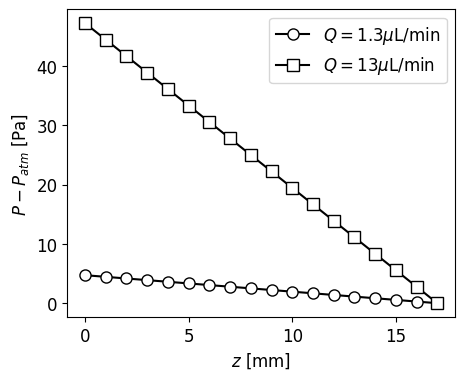

In [3]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81

# channel dimensions
W = 0.0005
H = 0.00005
L_channel = 0.017
alpha = W/H
Dh = 4*(4*W*H)/(2*(2*W + 2*H))

# outer tube dimensions
L_tube = 0.4 # length in m
D_tube = 0.001 # diameter in m

# outlet elevation (in m)
dh = 0.

# fluid properties
rho = 1000
mu = 0.001

# flow rate and average velocity
Q = 1.3 # flow rate in microlitre/min
Q = Q*1e-9/60 # flow rate in m^3/s
um = Q/(4*W*H) # average velocity
Re = rho/mu*um*Dh
l1 = (1-1.3553/alpha + 1.9467/alpha**2 - 1.7012/alpha**3 + 0.9563/alpha**4 - 0.2537/alpha**5)
lambda1 = 96/Re*l1
dpdz = lambda1*rho*um**2/(2*Dh)

# calculation of pressure at the exit of the channel
P_static = rho*g*dh
P_atm = 1.013e5
P_friction = mu*L_tube*Q/(32*np.pi*D_tube**4)
display(P_atm, P_static, P_friction)
P_out = P_atm + P_static + P_friction
display(P_out)

## pressure in the channel
nz = 171
z = np.linspace(0, L_channel, nz)
p = (L_channel - z)*dpdz + P_out - P_atm

# flow rate and average velocity
Q2 = 13 # flow rate in microlitre/min
Q2 = Q2*1e-9/60 # flow rate in m^3/s
um2 = Q2/(4*W*H) # average velocity
Re2 = rho/mu*um2*Dh
l1 = (1-1.3553/alpha + 1.9467/alpha**2 - 1.7012/alpha**3 + 0.9563/alpha**4 - 0.2537/alpha**5)
lambda12 = 96/Re2*l1
dpdz2 = lambda12*rho*um2**2/(2*Dh)

# calculation of pressure at the exit of the channel
P_static = rho*g*dh
P_atm = 1.013e5
P_friction2 = mu*L_tube*Q2/(32*np.pi*D_tube**4)
display(P_atm, P_static, P_friction2)
P_out2 = P_atm + P_static + P_friction2
display(P_out2)

## pressure in the channel
#nz = 18
#z = np.linspace(0, L_channel, nz)
p2 = (L_channel - z)*dpdz2 + P_out2 - P_atm

display(Q,Q2,dpdz,dpdz2)

# plot the pressure along the channel
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 12})
ax.set(
    xlabel='$z$ [mm]',
    ylabel='$P - P_{atm}$ [Pa]'
)
h = plt.plot(z*1000,p,color='k',marker='o',markerfacecolor='w',markevery=10,markersize=8,label='$Q = 1.3 \mu$L/min')
h = plt.plot(z*1000,p2,color='k',marker='s',markerfacecolor='w',markevery=10,markersize=8,label='$Q = 13 \mu$L/min')
lgd = plt.legend(loc='upper right')

plt.show()

datacsv = np.array([z*1000,p,p2])

np.savetxt('P_h00.csv', datacsv.T, header='z,P-Patm (0.0013 mL/min),P-Patm (0.013 mL/min)', delimiter=',', fmt='%f')